In [1]:
import os
import numpy as np
import random
from matplotlib import pyplot as plt
from matplotlib.image import imread
import cv2
from PIL import Image

In [2]:
%matplotlib inline
random.seed(142)

In [3]:
dataset_path = 'YaleDataset/'
dataset_dir  = os.listdir(dataset_path)

width  = 195
height = 231

In [4]:
# training_im, testing_im, training_label, testing_label = [], [], [], []
# types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
# for i in range(1,16):
#     im = {}
#     testing_type = random.choice(types)
#     for t in types:
#         im[t] = np.array(Image.open(path_to_folder+"YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
#         im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         if t == testing_type:
#             testing_im.append(im[t])
#             testing_label.append(i)
#         else:
#             training_im.append(im[t])
#             training_label.append(i)

In [5]:
def load_images():
    im_size=(64,64)
    training_im, testing_im, training_label, testing_label = [], [], [], []
    types = ["centerlight", "glasses", "happy", "leftlight", "noglasses","normal", "rightlight", "sad", "sleepy", "surprised", "wink"]
    for i in range(1,16):
        im = {}
        testing_type = random.sample(types, 2)
        for t in types:
            im[t] = np.array(Image.open("YaleDataset/subject"+str(i).zfill(2)+"."+t),'uint8')
            im[t] = cv2.resize(im[t], im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
            if t in testing_type:
                testing_im.append(im[t])
                testing_label.append(i)
            else:
                training_im.append(im[t])
                training_label.append(i)
    
    return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
training_im, training_label, testing_im, testing_label = load_images()

In [6]:
# def load_images():
#     im_size=(64,64)
#     training_im, testing_im, training_label, testing_label = [], [], [], []
#     im = {}
#     for i in os.listdir("YaleDataset/training_set"):
#         im = np.array(Image.open("YaleDataset/training_set/"+i),'uint8')
#         im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         training_im.append(im)
#         training_label.append(i.split(".")[0])
    
#     for i in os.listdir("YaleDataset/testing_set"):
#         im = np.array(Image.open("YaleDataset/testing_set/"+i),'uint8')
#         im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
#         testing_im.append(im)
#         testing_label.append(i.split(".")[0])
    
#     return np.array(training_im), np.array(training_label), np.array(testing_im), np.array(testing_label)
    
# training_im, training_label, testing_im, testing_label = load_images()

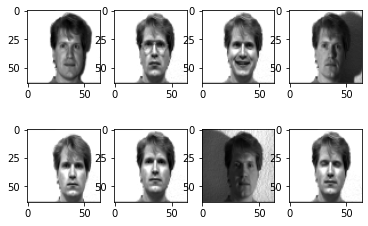

In [7]:
training_tensor = np.ndarray(shape=(len(training_im), 64*64), dtype=np.float64)

for i in range(len(training_im)):
    training_tensor[i,:] = np.array(training_im[i], dtype='float64').flatten()
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(training_im[i], cmap='gray')
plt.show()

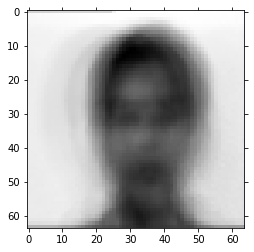

In [8]:
mean_face = np.zeros((1,64*64))

for i in training_tensor:
    mean_face = np.add(mean_face,i)

mean_face = np.divide(mean_face,float(len(training_im))).flatten()

plt.imshow(mean_face.reshape(64, 64), cmap='gray')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [9]:
height = 64
width = 64

normalised_training_tensor = np.ndarray(shape=(len(training_im), height*width))

for i in range(len(training_im)):
    normalised_training_tensor[i] = np.subtract(training_tensor[i],mean_face)

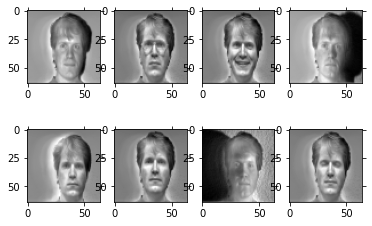

In [10]:
plt.clf()
for i in range(len(training_im)):
    img = normalised_training_tensor[i].reshape(height,width)
    if i<8:
        plt.subplot(2,4,1+i)
        plt.imshow(img, cmap='gray')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

# EIGENVECTORS AND VALUES USING SVD

In [11]:
len(training_im)
!ls CroppedYale

yaleB01  yaleB06  yaleB11  yaleB17  yaleB22  yaleB27  yaleB32  yaleB37
yaleB02  yaleB07  yaleB12  yaleB18  yaleB23  yaleB28  yaleB33  yaleB38
yaleB03  yaleB08  yaleB13  yaleB19  yaleB24  yaleB29  yaleB34  yaleB39
yaleB04  yaleB09  yaleB15  yaleB20  yaleB25  yaleB30  yaleB35
yaleB05  yaleB10  yaleB16  yaleB21  yaleB26  yaleB31  yaleB36


In [12]:
cov_matrix = np.cov(normalised_training_tensor)
cov_matrix = np.divide(cov_matrix,len(training_im))
print(cov_matrix.shape)
print('Covariance matrix of X: \n%s' %cov_matrix)

(135, 135)
Covariance matrix of X: 
[[ 1.80490554e+01  6.10937243e+00  6.21610914e+00 ... -3.17009137e+00
  -3.29178205e+00  2.06945985e+00]
 [ 6.10937243e+00  1.00649598e+01  9.06999316e+00 ... -2.14603599e-02
  -2.21792666e-01  9.05659737e-01]
 [ 6.21610914e+00  9.06999316e+00  1.07198897e+01 ...  6.34313921e-01
   6.23806349e-01  5.76557546e-01]
 ...
 [-3.17009137e+00 -2.14603599e-02  6.34313921e-01 ...  2.46363799e+01
   2.28943429e+01 -7.03816445e-01]
 [-3.29178205e+00 -2.21792666e-01  6.23806349e-01 ...  2.28943429e+01
   2.44234828e+01 -3.18147283e-01]
 [ 2.06945985e+00  9.05659737e-01  5.76557546e-01 ... -7.03816445e-01
  -3.18147283e-01  1.34685811e+01]]


In [13]:
eigenvalues, eigenvectors, = np.linalg.eig(cov_matrix)
print('Eigenvectors of Cov(X): \n%s' %eigenvectors)
print('\nEigenvalues of Cov(X): \n%s' %eigenvalues)

Eigenvectors of Cov(X): 
[[-0.06484045+0.j          0.02271007+0.j         -0.04574441+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02586807+0.j         -0.00019501+0.j         -0.04994809+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02397221+0.j         -0.00753007+0.j         -0.04642091+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 ...
 [ 0.03381419+0.j         -0.09117673+0.j          0.03271617+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [ 0.02982356+0.j         -0.10071192+0.j          0.02857239+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]
 [-0.02019039+0.j         -0.07176294+0.j         -0.03106351+0.j
  ...  0.00712921+0.j          0.03718204-0.07159579j
   0.03718204+0.07159579j]]

Eigenvalues of Cov(X): 
[ 1.35040844e+03+0.00000000e+00j  4.87033654e+02+0.00000000e+0

In [14]:
eigenvectors.shape

(135, 135)

In [15]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the eigen pairs in descending order:
eig_pairs.sort(reverse=True)
eigvalues_sort  = np.array([eig_pairs[index][0] for index in range(len(eigenvalues))])
eigvectors_sort = np.array([eig_pairs[index][1] for index in range(len(eigenvalues))])

[1350.40844439+0.00000000e+00j 1837.4420985 +0.00000000e+00j
 2176.06945885+0.00000000e+00j 2381.03501176+0.00000000e+00j
 2556.48244437+0.00000000e+00j 2688.3817302 +0.00000000e+00j
 2798.18143208+0.00000000e+00j 2892.39513085+0.00000000e+00j
 2974.34093399+0.00000000e+00j 3032.95888263+0.00000000e+00j
 3082.58278499+0.00000000e+00j 3125.03007859+0.00000000e+00j
 3164.50549558+0.00000000e+00j 3202.02452025+0.00000000e+00j
 3236.22169491+0.00000000e+00j 3268.72578446+0.00000000e+00j
 3296.8920363 +0.00000000e+00j 3322.82281764+0.00000000e+00j
 3346.76328003+0.00000000e+00j 3368.5316495 +0.00000000e+00j
 3388.73187159+0.00000000e+00j 3407.06925394+0.00000000e+00j
 3424.99416775+0.00000000e+00j 3441.85763362+0.00000000e+00j
 3457.84831427+0.00000000e+00j 3473.0864241 +0.00000000e+00j
 3486.52529862+0.00000000e+00j 3499.32360347+0.00000000e+00j
 3511.49638098+0.00000000e+00j 3522.8762232 +0.00000000e+00j
 3534.12859361+0.00000000e+00j 3545.22804711+0.00000000e+00j
 3555.10605291+0.0000000

/usr/local/lib/python3.8/dist-packages/matplotlib/collections.py:206: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


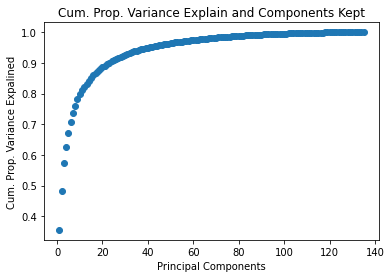

In [16]:
var_comp_sum = np.cumsum(eigvalues_sort)/sum(eigvalues_sort)
print(np.cumsum(eigvalues_sort))

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(1,len(eigvalues_sort)+1)
plt.title('Cum. Prop. Variance Explain and Components Kept')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.show()

In [17]:
reduced_data = np.array(eigvectors_sort[:1000]).transpose()

In [18]:
proj_data = np.dot(training_tensor.transpose(),reduced_data)
proj_data = proj_data.transpose()

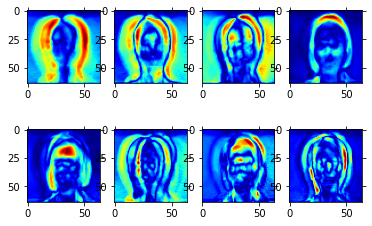

In [19]:
for i in range(proj_data.shape[0]):
    img = proj_data[i].reshape(height,width)
    if i < 8:
        plt.subplot(2,4,1+i)
        plt.imshow(np.abs(img), cmap='jet')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [20]:
w = np.array([np.dot(proj_data,i) for i in normalised_training_tensor])

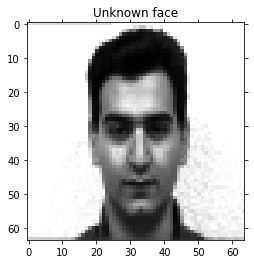

In [21]:
unknown_face        = testing_im[-1]
# unknown_face        = plt.imread('Dataset/subject12.normal.jpg')
unknown_face_vector = np.array(unknown_face, dtype='float64').flatten()

plt.imshow(unknown_face, cmap='gray')
plt.title('Unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

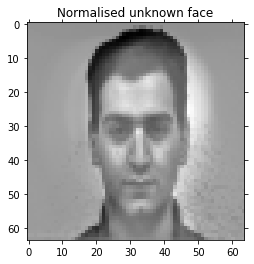

In [22]:
normalised_uface_vector = np.subtract(unknown_face_vector,mean_face)

plt.imshow(normalised_uface_vector.reshape(height, width), cmap='gray')
plt.title('Normalised unknown face')
plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
plt.show()

In [23]:
w_unknown = np.dot(proj_data, unknown_face_vector)
w_unknown

array([-1.40320580e+07+0.00000000e+00j, -1.24069367e+08+0.00000000e+00j,
        3.33826646e+06+0.00000000e+00j,  7.46516630e+06+0.00000000e+00j,
       -5.02101779e+07+0.00000000e+00j,  8.66605393e+07+0.00000000e+00j,
        4.45922341e+07+0.00000000e+00j, -4.63693934e+04+0.00000000e+00j,
        5.34652700e+07+0.00000000e+00j, -6.12660763e+07+0.00000000e+00j,
       -4.76250311e+07+0.00000000e+00j,  4.05370307e+07+0.00000000e+00j,
        4.80517649e+06+0.00000000e+00j,  2.42387450e+06+0.00000000e+00j,
       -3.20130454e+07+0.00000000e+00j,  4.04879296e+05+0.00000000e+00j,
        1.48305413e+07+0.00000000e+00j,  1.30792559e+06+0.00000000e+00j,
        4.48965597e+05+0.00000000e+00j,  4.95381986e+07+0.00000000e+00j,
        3.95507473e+06+0.00000000e+00j,  1.52626551e+07+0.00000000e+00j,
        5.82299276e+06+0.00000000e+00j,  1.95746769e+07+0.00000000e+00j,
       -4.67365229e+07+0.00000000e+00j, -2.24001036e+07+0.00000000e+00j,
        5.02409036e+06+0.00000000e+00j, -1.69447822

In [24]:
diff = w - w_unknown
norms = np.linalg.norm(diff, axis=1)
print(norms)

[2.27001603e+09 2.11062520e+09 2.12747808e+09 2.82810766e+09
 2.11452639e+09 2.11122257e+09 3.31654637e+09 2.11901560e+09
 2.12791982e+09 2.18201817e+09 2.30231625e+09 2.62620292e+09
 2.33959908e+09 2.33959908e+09 2.69020911e+09 2.33634662e+09
 2.37286383e+09 2.31820256e+09 2.21620594e+09 2.17012004e+09
 2.14690012e+09 2.82292041e+09 3.21847967e+09 2.14101508e+09
 2.14116076e+09 2.14875525e+09 2.15611911e+09 2.22832100e+09
 2.30690038e+09 2.28496562e+09 2.67858352e+09 3.23315217e+09
 2.30085327e+09 2.28139528e+09 2.29265289e+09 2.28585699e+09
 2.14372076e+09 2.61976907e+09 2.14113804e+09 2.13437212e+09
 3.27338250e+09 2.13591906e+09 2.13609429e+09 2.15894759e+09
 2.14575152e+09 2.34626984e+09 2.70473284e+09 2.96811864e+09
 2.63549679e+09 2.63926440e+09 2.66156587e+09 2.64545438e+09
 2.70441258e+09 2.68368649e+09 2.28577288e+09 2.20296223e+09
 2.16105775e+09 2.86313417e+09 2.20732343e+09 2.20732343e+09
 2.87166872e+09 2.18729053e+09 2.18870798e+09 2.17154755e+09
 2.18671615e+09 2.171386

In [25]:
w.shape

(135, 135)

1


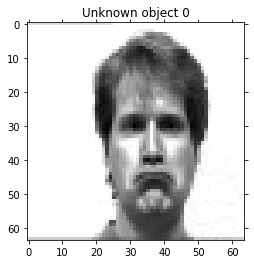

4122192.0997261596


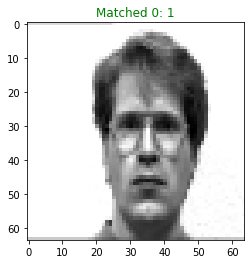

1
1
1


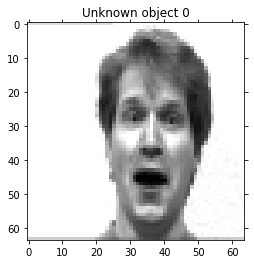

6909918.0048492225


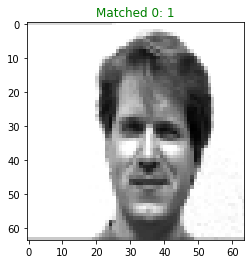

1
1
2


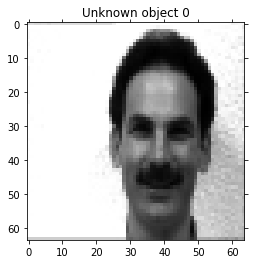

19921159.164084546


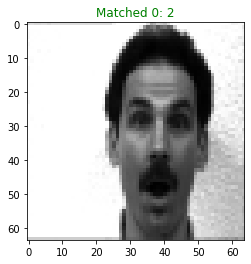

2
2
2


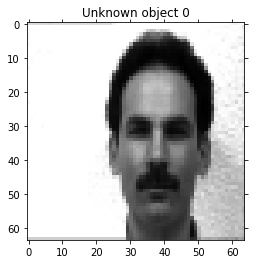

7392805.097781257


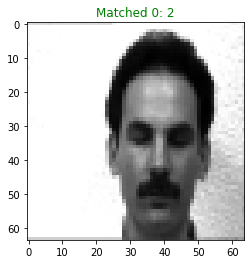

2
2
3


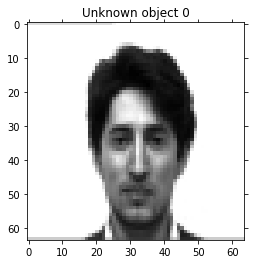

13047887.377880657


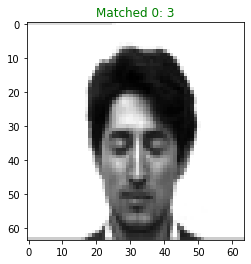

3
3
3


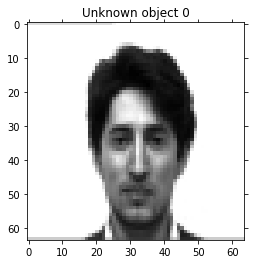

13047887.377880657


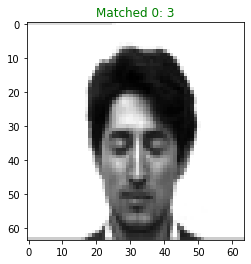

3
3
4


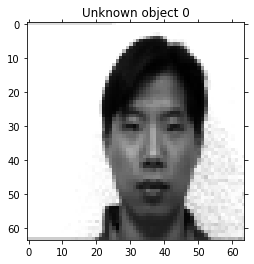

22853740.249457672


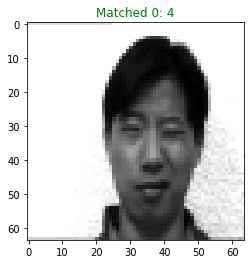

4
4
4


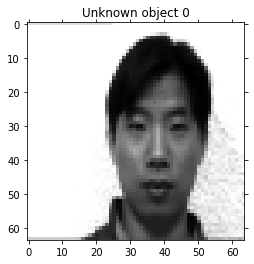

0.0


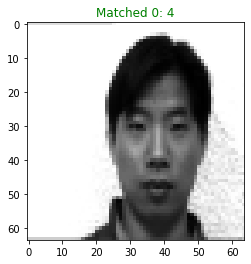

4
4
5


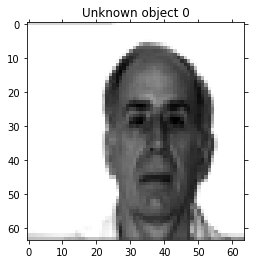

10465029.960487869


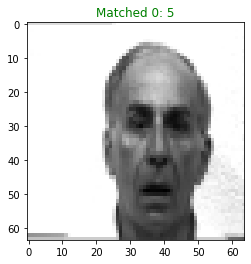

5
5
5


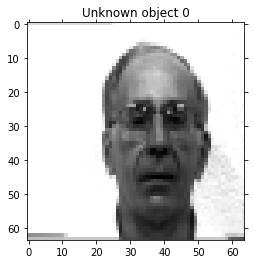

3833643.5621366226


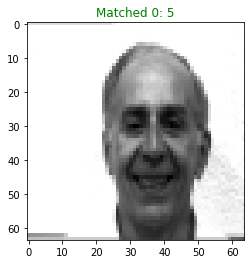

5
5
6


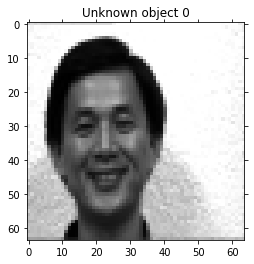

5838465.161139335


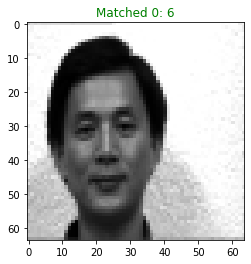

6
6
6


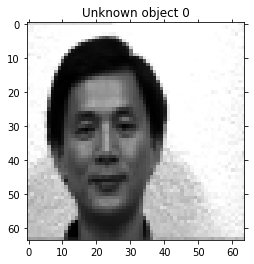

0.0


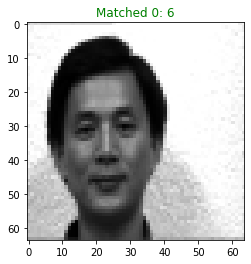

6
6
7


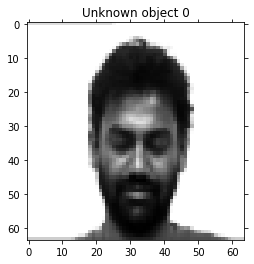

2802004.4847735986


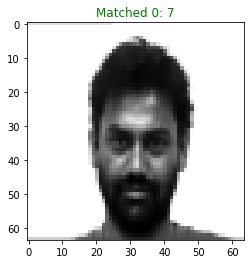

7
7
7


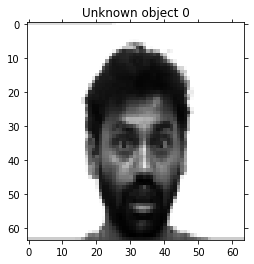

14845215.61314765


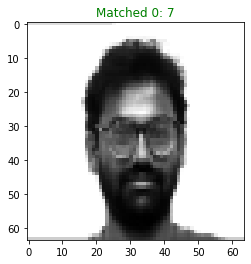

7
7
8


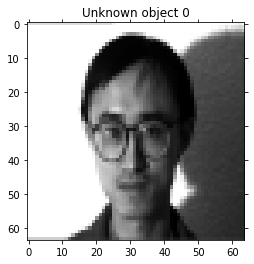

47467015.65711408


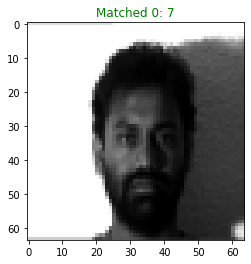

8
7
8


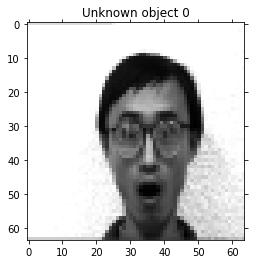

23477237.21751571


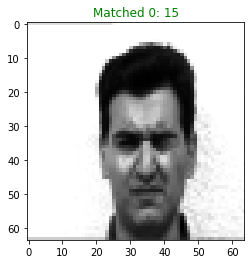

8
15
9


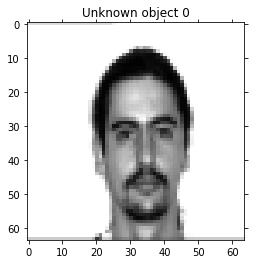

87271876.62383024
9


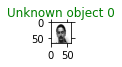

8191835.9965291675


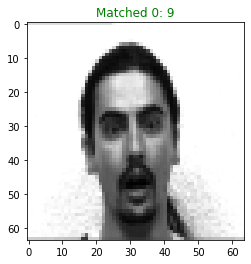

9
9
10


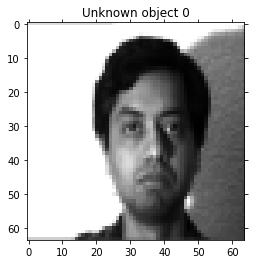

32869583.300664514


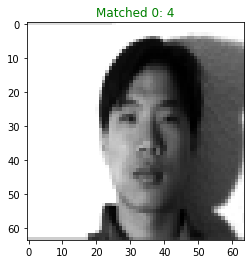

10
4
10


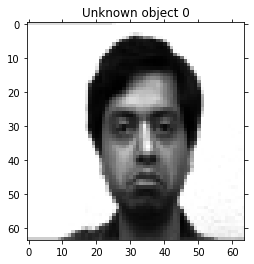

3728441.547639004


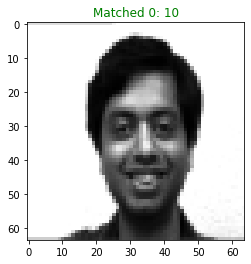

10
10
11


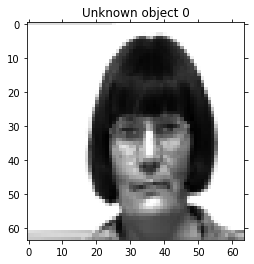

16077295.025670374


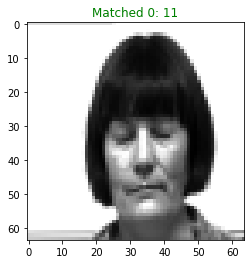

11
11
11


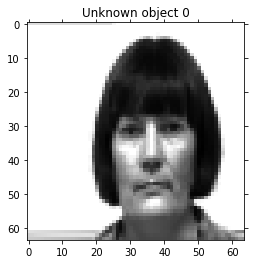

10853425.622270502


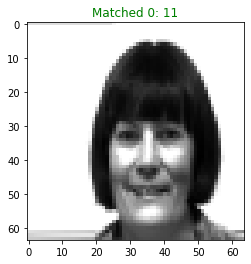

11
11
12


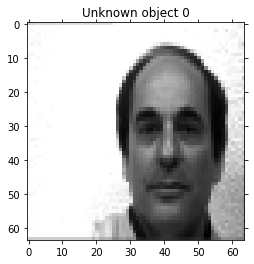

0.0


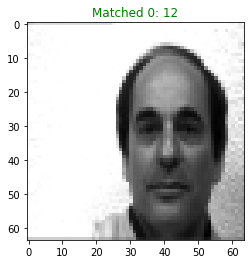

12
12
12


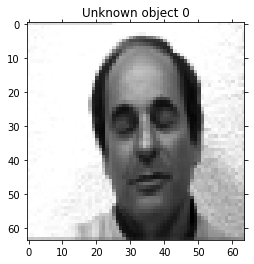

19333982.023096345


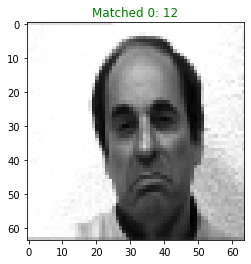

12
12
13


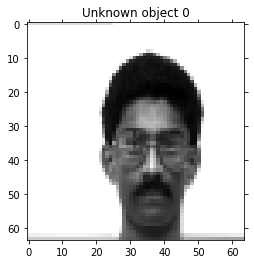

5040618.088623028


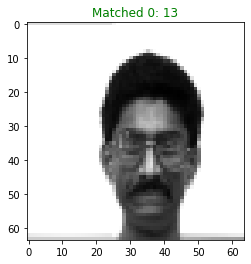

13
13
13


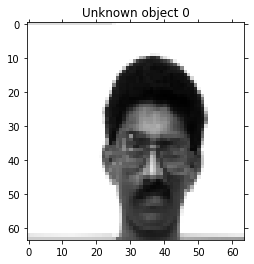

8964541.76103698


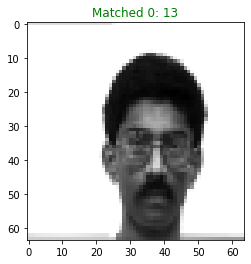

13
13
14


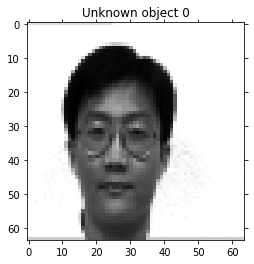

32589476.991377648


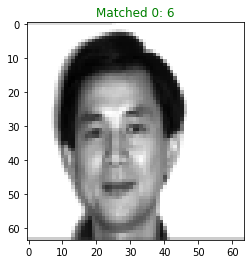

14
6
14


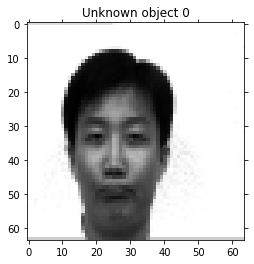

22374278.953527726


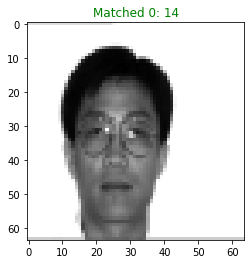

14
14
15


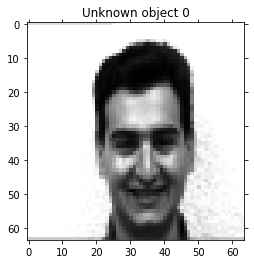

8046512.487091916


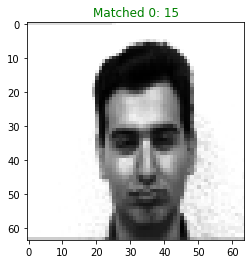

15
15
15


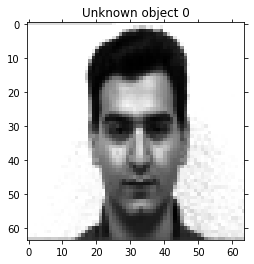

3685807.4255811907


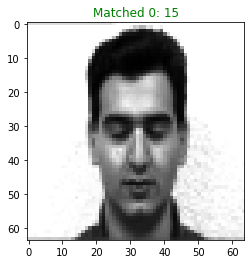

15
15
Correct predictions: 25/30 = 83.33333333333334%


In [27]:
correct_pred = 0
count=0
num_images=0
def recogniser(curr_testing_im, curr_testing_label, proj_data, w):
    global count, num_images, correct_pred
    print(curr_testing_label)
    
    unknown_face = curr_testing_im
    unknown_face_vector = np.array(curr_testing_im, dtype='float64').flatten()
    normalised_uface_vector = unknown_face_vector-mean_face
    print("=====================")
    plt.imshow(unknown_face, cmap='gray')
    plt.title(f'Unknown object {count}')
    plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='on',left='off', which='both')
    
    plt.show()
    w_unknown = np.dot(proj_data, normalised_uface_vector)
    diff  = w - w_unknown
    norms = np.linalg.norm(diff, axis=1)
    index = np.argmin(norms)
    
    t1 = 82836715
    t0 = 50532474  #59677998.106381364  52532474.26369931
    print(norms[index])
    if norms[index] < t1:

        if norms[index] < t0: # It's a face
            plt.title(f'Matched {count}: {training_label[index]}', color='g')
            plt.imshow(training_im[index], cmap='gray')
            plt.show()
            print(curr_testing_label)
            print(training_label[index])
            print("=====================")
            if curr_testing_label == training_label[index]:
                correct_pred += 1
        else:
            print("AAAAAAAAAAAAAAAAAAAAAAA")
            if int(curr_testing_label) not in training_label:
                plt.title('Unknown face!', color='g')
                correct_pred += 1
            else:
                plt.title('Unknown face!', color='r')
#         plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
#         plt.subplots_adjust(right=1.2, top=2.5)
    
    else:     
        plt.subplot(9,4,1+count)
        if int(curr_testing_label) == -2:
            plt.title('Not a face!', color='r')
            correct_pred += 1
        else:
            plt.title('Not a face!', color='g')
        plt.tick_params(labelleft='off', labelbottom='off', bottom='off',top='off',right='off',left='off', which='both')
    

# fig = plt.figure(figsize=(15, 15))
for idx, curr_testing_im in enumerate(testing_im):
    recogniser(curr_testing_im, testing_label[idx], proj_data, w)

# plt.show()

print('Correct predictions: {}/{} = {}%'.format(correct_pred, testing_im.shape[0], correct_pred/testing_im.shape[0]*100))

In [28]:
print(len(training_im))

135


In [29]:
# im_size=(64,64)
# folder_path = "YaleDataset/testing_set"
# apple_im = np.array(Image.open(apple_path),'uint8')
# apple_im = cv2.resize(apple_im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)

In [30]:
# recogniser(apple_im, "no_face", proj_data, w)

In [31]:
im_size=(64,64)
new_testing_im=[]
new_testing_label=[]
for i in os.listdir("YaleDataset/testing_set"):
    im = np.array(Image.open("YaleDataset/testing_set/"+i),'uint8')
    if len(im.shape) == 3:
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.resize(im, im_size, fx=0.5, fy=0.5, interpolation = cv2.INTER_AREA)
    new_testing_im.append(im)
    new_testing_label.append(i.split(".")[0])
new_testing_im=np.array(new_testing_im)
new_testing_label=np.array(new_testing_label)

In [32]:
print(new_testing_label)

['-1' '-1' '-2' '-1' '-1' '-1']


-1


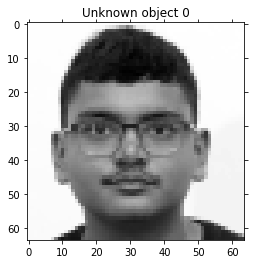

75628097.52844627
AAAAAAAAAAAAAAAAAAAAAAA
-1


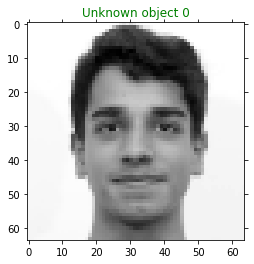

59551943.341897234
AAAAAAAAAAAAAAAAAAAAAAA
-2


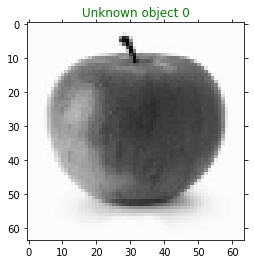

92836715.02150176
-1


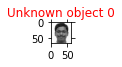

79754014.37053241
AAAAAAAAAAAAAAAAAAAAAAA
-1


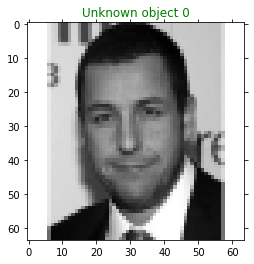

59677998.106381364
AAAAAAAAAAAAAAAAAAAAAAA
-1


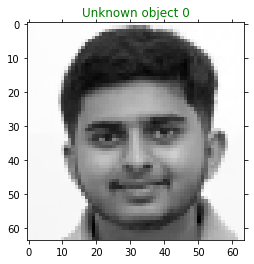

53351323.588974275
AAAAAAAAAAAAAAAAAAAAAAA


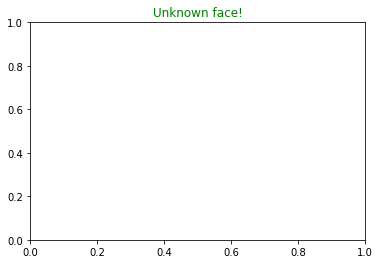

In [33]:
for idx, img in enumerate(new_testing_im):
    recogniser(img, new_testing_label[idx], proj_data, w)

In [ ]:
print(new_testing_im[0].shape)

In [ ]:
testing_label